In [1]:
######################################################
#
# Importing all required libraries
#
######################################################
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.models import Sequential
from keras.layers import Embedding
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN

In [2]:
######################################################
#
# Uploading Data
#
######################################################
train = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
test = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")

In [3]:
######################################################
#
# Looking over the dataset
#
######################################################
train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [4]:
##########################################################################################
#
#                               ***Data Description***
#
#
#
### Train Data Size: [2934817 rows x 19 columns]
#
#
### Test Data Size: [733704 rows x 19 columns]
#
# 1. pkSeqID: Row Identifier
# 2. proto: Textual representation of transaction protocols present in network flow          
# 3. saddr: Source IP Address
# 4. sport: Source Port Number
# 5. daddr: Destination IP Address
# 6. dport: Destination Port Number
# 7. seq: Argus sequence number
# 8. stddev: Standard deviation of aggregated records
# 9. N_IN_Conn_P_SrcIP: Number of inbound connections per source IP.
# 10. min: Minimum duration of aggregated records
# 11. state_number: Numerical representation of feature state
# 12. mean: Average duration of aggregated records
# 13. N_IN_Conn_P_DstIP: Number of inbound connections per destination IP.
# 14. srate: Source-to-destination packets per second
# 15. drate: Destination-to-source packets per second
# 16. max: Maximum duration of aggregated records
# 17. attack: Class label 0 for Normal traffic, 1 for Attack Traffic
# 18. category (Target Column): Traffic category
# 19. subcategory: Traffic subcategory
#
############################################################################################

In [5]:
######################################################
#
# Looking over the dataset
#
######################################################
test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [6]:
######################################################
#
# Looking over the dataset
#
######################################################
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [7]:
######################################################
#
# Looking over the dataset
#
######################################################
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733705 entries, 0 to 733704
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            733705 non-null  int64  
 1   proto              733705 non-null  object 
 2   saddr              733705 non-null  object 
 3   sport              733705 non-null  object 
 4   daddr              733705 non-null  object 
 5   dport              733705 non-null  object 
 6   seq                733705 non-null  int64  
 7   stddev             733705 non-null  float64
 8   N_IN_Conn_P_SrcIP  733705 non-null  int64  
 9   min                733705 non-null  float64
 10  state_number       733705 non-null  int64  
 11  mean               733705 non-null  float64
 12  N_IN_Conn_P_DstIP  733705 non-null  int64  
 13  drate              733705 non-null  float64
 14  srate              733705 non-null  float64
 15  max                733705 non-null  float64
 16  at

In [8]:
######################################################
#
# Looking for null values in test data
#
######################################################
test.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [9]:
######################################################
#
# Looking for null values in train data
#
######################################################
train.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [10]:
######################################################
#
# Dropping pkSeqID and seq because they're identifying
# rows for which we have ip addresses. Dropping 
# subcategory because we are already dealing with the 
# column 'category'.
#
######################################################
train.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
test.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
train.dtypes[train.dtypes=='object']

proto       object
saddr       object
sport       object
daddr       object
dport       object
category    object
dtype: object

In [11]:
######################################################
#
# Finding the columns that needs categorizing
# 
######################################################
train['proto'].value_counts()

udp          1596819
tcp          1330598
icmp            7228
arp              166
ipv6-icmp          6
Name: proto, dtype: int64

In [12]:
######################################################
#
# Finding the columns that needs categorizing
# 
######################################################
train['saddr'].value_counts()

192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712260
192.168.100.149              711466
192.168.100.3                  6609
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:89ee          2
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:c038          2
fe80::250:56ff:febe:e9d9          1
Name: saddr, dtype: int64

In [13]:
######################################################
#
# Finding the columns that needs categorizing
# 
######################################################
train['sport'].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
27738       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [14]:
######################################################
#
# 'theft' is not considered as a network intrusion 
# category. that's why we're dropping it
# 
######################################################
drop_theft = train[train['category']=='Theft'].index
train.drop(drop_theft , inplace=True)

In [15]:
######################################################
#
# 'theft' is not considered as a network intrusion 
# category. that's why we're dropping it
# 
######################################################
drop_theft = test[test['category']=='Theft'].index
test.drop(drop_theft , inplace=True)

Replacing the string '0x'

In [16]:
######################################################
#
# Finding the number of the string '0x' in the column
# 'sport'
# 
######################################################
search_string='0x'
result = set([i for i in train['sport'] if i.startswith(search_string)])
result

{'0x0008', '0x000d', '0x0011', '0x0303'}

In [17]:
######################################################
#
# Replacing the string '0x' with relevant numbers from
# the data
# 
######################################################
train['sport']=train['sport'].replace(['0x0303'],'771') 
train['sport']=train['sport'].replace(['0x0011'],'17')
train['sport']=train['sport'].replace(['0x000d'],'13')
train['sport']=train['sport'].replace(['0x0008'],'8')
train['sport']=train['sport'].replace(['0x0303'],'771') 
train['sport']=train['sport'].replace(['0x0011'],'17')
train['sport']=train['sport'].replace(['0x000d'],'13')
train['sport']=train['sport'].replace(['0x0008'],'8')

In [18]:
######################################################
#
# Converting the cell values into integer
# 
######################################################
train["sport"] = train["sport"].astype(str).astype(int)

In [19]:
######################################################
#
# Finding the number of the string '0x' in the column
# 
######################################################
search_string='0x'
result = set([i for i in train['dport'] if i.startswith(search_string)])
print(len(result))
result

1062


{'0x55d1',
 '0xfab2',
 '0xb4c5',
 '0x2756',
 '0xbfab',
 '0x4140',
 '0x0004',
 '0xd796',
 '0x41e0',
 '0x01c0',
 '0xc4b5',
 '0x0300',
 '0xb004',
 '0x9a24',
 '0xf503',
 '0xaed0',
 '0x8549',
 '0xf3a3',
 '0x43f8',
 '0x7417',
 '0x92e2',
 '0x500e',
 '0xf37b',
 '0x2e40',
 '0xcaf2',
 '0xd001',
 '0x3e54',
 '0xfa42',
 '0x984a',
 '0xb105',
 '0x5077',
 '0x768b',
 '0x834a',
 '0x7fbc',
 '0x4ed3',
 '0x581b',
 '0x2788',
 '0x1187',
 '0x9e4e',
 '0x1b4e',
 '0x7240',
 '0x005a',
 '0x5443',
 '0x7202',
 '0xb75d',
 '0x8e49',
 '0x2bc0',
 '0x5669',
 '0x760e',
 '0x9a05',
 '0x8dd6',
 '0x5644',
 '0x4d6f',
 '0x1192',
 '0x87ef',
 '0xbe04',
 '0xdcad',
 '0xf338',
 '0x28c0',
 '0x8753',
 '0x3a03',
 '0xf3e1',
 '0xf448',
 '0x09c0',
 '0x21c0',
 '0x0202',
 '0x25c0',
 '0xec87',
 '0x4d04',
 '0x6d07',
 '0x2c04',
 '0x7752',
 '0x0803',
 '0x83a6',
 '0x6144',
 '0x00c9',
 '0x208e',
 '0x4ddb',
 '0x770e',
 '0xcd42',
 '0xf684',
 '0xaa54',
 '0x0945',
 '0x00ab',
 '0x1104',
 '0xd459',
 '0x0e4a',
 '0xb343',
 '0x3280',
 '0x2b42',
 '0x8501',

In [20]:
######################################################
#
# Converting the values consisted with '0x' into integer
# 
######################################################
train['dport']=train.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [21]:
######################################################
#
# Counting the number of values in 'dport'
# 
######################################################
train['dport'].value_counts()

 80       2858794
 1           5379
 3306        3757
 53           275
-1            163
           ...   
 6263           1
 40023          1
 2165           1
 40022          1
 13117          1
Name: dport, Length: 6778, dtype: int64

In [22]:
######################################################
#
# Replacing the string '0x' in test data with relevant
# values in the column
# 
######################################################
test['sport']=test['sport'].replace(['0x0303'],'771') 
test['sport']=test['sport'].replace(['0x0011'],'17')
test['sport']=test['sport'].replace(['0x000d'],'13')
test['sport']=test['sport'].replace(['0x0008'],'8')

In [23]:
test["sport"] = test["sport"].astype(str).astype(int)

In [24]:
test['dport'] = test.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

Label Encoding

In [25]:
######################################################
#
# Performing label encoding in train and test data
# 
######################################################
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["saddr_enc"]= le.fit_transform(train.saddr)
train["daddr_enc"]= le.fit_transform(train.daddr)
train["proto_enc"]= le.fit_transform(train.proto)
train["category_enc"]= le.fit_transform(train.category)
train.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [26]:
test["saddr_enc"]= le.fit_transform(test.saddr)
test["daddr_enc"]= le.fit_transform(test.daddr)
test["proto_enc"]= le.fit_transform(test.proto)
test["category_enc"]= le.fit_transform(test.category)
test.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [27]:
######################################################
#
# Final look in the data
# 
######################################################
train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc,category_enc
0,6551,80,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,4,15,4,0
1,5532,80,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,4,15,3,0
2,27165,80,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,1,15,3,0
3,48719,80,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,4,15,4,1
4,22461,80,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,1,15,4,0


In [28]:
######################################################
#
# Final look in the data
# 
######################################################
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733691 entries, 0 to 733704
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sport              733691 non-null  int32  
 1   dport              733691 non-null  int64  
 2   stddev             733691 non-null  float64
 3   N_IN_Conn_P_SrcIP  733691 non-null  int64  
 4   min                733691 non-null  float64
 5   state_number       733691 non-null  int64  
 6   mean               733691 non-null  float64
 7   N_IN_Conn_P_DstIP  733691 non-null  int64  
 8   drate              733691 non-null  float64
 9   srate              733691 non-null  float64
 10  max                733691 non-null  float64
 11  attack             733691 non-null  int64  
 12  saddr_enc          733691 non-null  int32  
 13  daddr_enc          733691 non-null  int32  
 14  proto_enc          733691 non-null  int32  
 15  category_enc       733691 non-null  int32  
dtypes:

In [29]:
######################################################
#
# Final look in the data
# 
######################################################
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2934752 entries, 0 to 2934816
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sport              int32  
 1   dport              int64  
 2   stddev             float64
 3   N_IN_Conn_P_SrcIP  int64  
 4   min                float64
 5   state_number       int64  
 6   mean               float64
 7   N_IN_Conn_P_DstIP  int64  
 8   drate              float64
 9   srate              float64
 10  max                float64
 11  attack             int64  
 12  saddr_enc          int32  
 13  daddr_enc          int32  
 14  proto_enc          int32  
 15  category_enc       int32  
dtypes: float64(6), int32(5), int64(5)
memory usage: 324.7 MB


Splitting training and testing values

In [30]:
######################################################
#
# Assigning target column into y_train and y_test
# 
######################################################
y_train=train["category_enc"]

In [31]:
######################################################
#
# Assigning target column into y_train and y_test
# 
######################################################
y_test=test["category_enc"]

In [32]:
pd.Series(y_test).value_counts()

0    385309
1    330112
3     18163
2       107
Name: category_enc, dtype: int64

In [33]:
######################################################
#
# Standardizing and separting feature columns from 
# train and test data
# 
######################################################
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
train= pd.DataFrame(scaled_features,columns=cols)

In [34]:
######################################################
#
# Standardizing and separting feature columns from 
# train and test data
# 
######################################################
features = test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
test= pd.DataFrame(scaled_features,columns=cols)

In [35]:
######################################################
#
# Final look in the data
# 
######################################################
train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,-1.380796,-0.094028,1.260991,0.715435,-0.685661,0.729327,0.301113,0.415159,-0.00763,-0.003355,0.543986,0.011229,1.301786,-0.638504,0.897321
1,-1.434107,-0.094028,-1.006649,-1.826659,1.914132,-0.113083,1.122991,0.415159,-0.00763,-0.003659,0.533940,0.011229,1.301786,-0.638504,-1.049199
2,-0.302346,-0.094028,-0.769399,0.715435,1.319054,-0.113083,0.731954,0.415159,-0.00763,-0.003610,0.316991,0.011229,-1.281470,-0.638504,-1.049199
3,0.825282,-0.094028,1.164956,-0.801621,-0.685661,0.729327,0.653814,-1.621898,-0.00763,-0.003397,1.033365,0.011229,1.301786,-0.638504,0.897321
4,-0.548442,-0.094028,-0.080342,0.715435,1.323028,0.729327,1.154811,0.415159,-0.00763,-0.002707,1.061389,0.011229,-1.281470,-0.638504,0.897321


In [36]:
######################################################
#
# Final look in the data
# 
######################################################
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934752 entries, 0 to 2934751
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sport              float64
 1   dport              float64
 2   stddev             float64
 3   N_IN_Conn_P_SrcIP  float64
 4   min                float64
 5   state_number       float64
 6   mean               float64
 7   N_IN_Conn_P_DstIP  float64
 8   drate              float64
 9   srate              float64
 10  max                float64
 11  attack             float64
 12  saddr_enc          float64
 13  daddr_enc          float64
 14  proto_enc          float64
dtypes: float64(15)
memory usage: 335.9 MB


Balancing the dataset by over and under sampling

In [37]:
pd.Series(y_train).value_counts()

0    1541315
1    1320148
3      72919
2        370
Name: category_enc, dtype: int64

In [38]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.svm import SVC
import imblearn
from imblearn.over_sampling import RandomOverSampler
samp_strat= { 0 : 1541315, 1 : 1320148, 2 : 72919, 3 : 72919}
random_over= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_over.fit_resample(train,y_train)

from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 72919, 1 : 72919, 2 : 72919, 3 : 72919}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
Xres1,yres1 = random_under.fit_resample(Xres,yres)

In [39]:
pd.Series(yres1).value_counts()

0    72919
1    72919
2    72919
3    72919
Name: category_enc, dtype: int64

In [40]:
######################################################
#
# Balancing the dataset by over and under sampling
# 
######################################################
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 385309, 1 : 330112, 2 : 330112, 3 : 330112}
random_over_1= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
test,y_test = random_over_1.fit_resample(test,y_test)

In [41]:
pd.Series(y_test).value_counts()

0    385309
1    330112
2    330112
3    330112
Name: category_enc, dtype: int64

In [42]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 14584, 1 : 14584, 2 : 14584, 3 : 14584}
random_over_2= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
test,y_test = random_over_2.fit_resample(test,y_test)

In [43]:
pd.Series(y_test).value_counts()

0    14584
1    14584
2    14584
3    14584
Name: category_enc, dtype: int64

In [44]:
######################################################
#
# Defining callback for model training so that the 
# training stops after reaching the train accuracy
# to 99%
# 
######################################################
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99 ):
            print("\nReached 99.20% accuracy so cancelling training!")
            self.model.stop_training = True

callback=myCallback()

In [45]:
######################################################
#
# Initializing the optimizer instead of 'Adam'to 
# define the learning rate
# 
######################################################
from tensorflow.keras import optimizers
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [46]:
Xres1.shape

(291676, 15)

In [47]:
######################################################
#
# Designing the Simple RNN model with four dense layer
# 
######################################################
n_samples, n_feats = Xres1.shape[0], Xres1.shape[1]
Xres1=np.array(Xres1)
Xres1 = Xres1.reshape((n_samples, n_feats, 1))
yres1=np.array(yres1)
yres1 = to_categorical(yres1, 4)
model = Sequential()
model.add(SimpleRNN(n_feats, input_shape=(n_feats, 1)))
model.add(Dense(20))
model.add(Dense(60))
model.add(Dense(80))
model.add(Dense(90))
model.add(Dense(4, activation='softmax'))

In [48]:
######################################################
#
# Compiling the model
# 
######################################################
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [49]:
######################################################
#
# Preparing the validation data
# 
######################################################
n_samples, n_feats = test.shape[0], test.shape[1]
test=np.array(test)
test = test.reshape((n_samples, n_feats, 1))
y_test=np.array(y_test)
y_test = to_categorical(y_test, 4)

In [50]:
######################################################
#
# Model overview
# 
######################################################
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15)                255       
                                                                 
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 60)                1260      
                                                                 
 dense_2 (Dense)             (None, 80)                4880      
                                                                 
 dense_3 (Dense)             (None, 90)                7290      
                                                                 
 dense_4 (Dense)             (None, 4)                 364       
                                                                 
Total params: 14,369
Trainable params: 14,369
Non-traina

In [51]:
######################################################
#
# Training the model
# 
######################################################
history = model.fit(Xres1, yres1,batch_size=512,
                                    epochs=1000,
                                    validation_data=(test, y_test),callbacks =[callback],
                                    workers=4)

Epoch 1/1000
570/570 [==============================] - 13s 18ms/step - loss: 0.5206 - accuracy: 0.8018 - val_loss: 0.2792 - val_accuracy: 0.8902
Epoch 2/1000
570/570 [==============================] - 9s 15ms/step - loss: 0.1689 - accuracy: 0.9354 - val_loss: 0.1349 - val_accuracy: 0.9444
Epoch 3/1000
570/570 [==============================] - 8s 15ms/step - loss: 0.1011 - accuracy: 0.9623 - val_loss: 0.1000 - val_accuracy: 0.9632
Epoch 4/1000
570/570 [==============================] - 6s 11ms/step - loss: 0.0781 - accuracy: 0.9712 - val_loss: 0.0832 - val_accuracy: 0.9701
Epoch 5/1000
570/570 [==============================] - 8s 13ms/step - loss: 0.0666 - accuracy: 0.9768 - val_loss: 0.0657 - val_accuracy: 0.9749
Epoch 6/1000
570/570 [==============================] - 8s 14ms/step - loss: 0.0597 - accuracy: 0.9804 - val_loss: 0.0672 - val_accuracy: 0.9752
Epoch 7/1000
570/570 [==============================] - 9s 15ms/step - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.0571 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


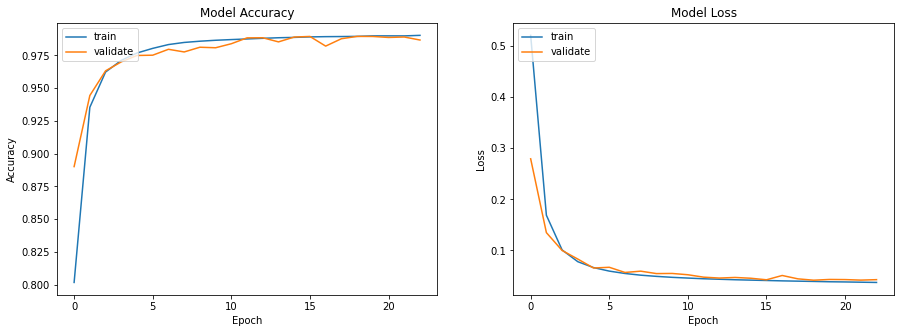

In [52]:
######################################################
#
# Plotting model accuracy, validation accuracy and
# model loss
# 
######################################################
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [53]:
######################################################
#
# Test accuray of the model
# 
######################################################
scores = model.evaluate(test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1823/1823 [==============================] - 15s 8ms/step - loss: 0.0430 - accuracy: 0.9867
Test loss: 0.04299243167042732
Test accuracy: 0.986732006072998


In [54]:
######################################################
#
# Defining function for plotting the confusion matrix
# 
######################################################
pred = model.predict(test)

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

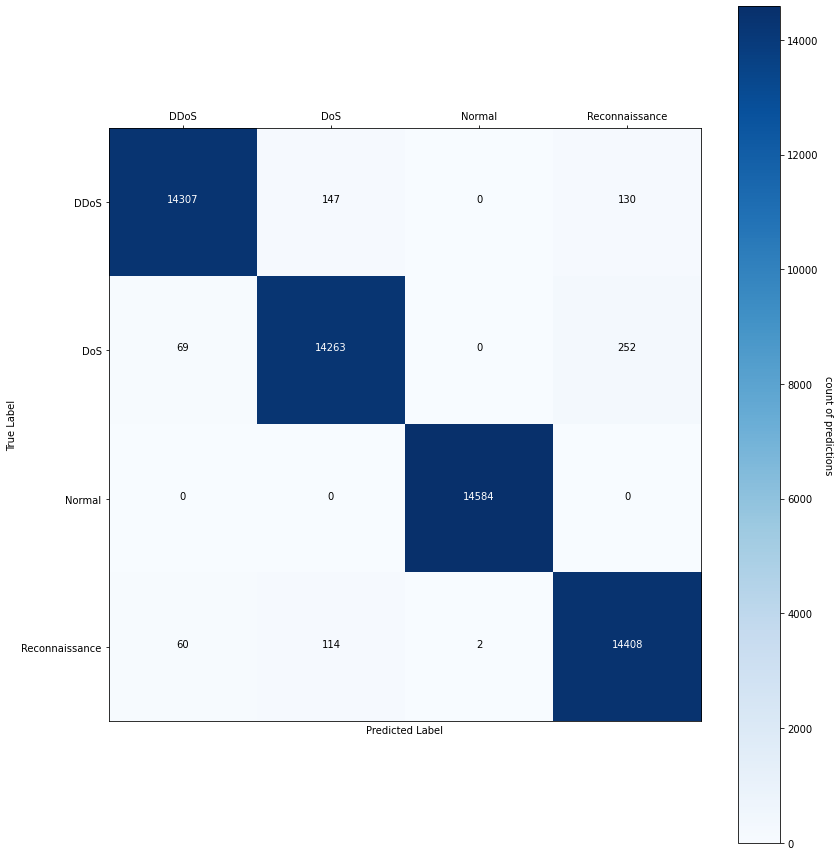

In [55]:
######################################################
#
# Plotting the confusion matrix
# 
######################################################
labels = ['DDoS', 'DoS', 'Normal', 'Reconnaissance']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [56]:
######################################################
#
# Finding the classification report
# 
######################################################
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_true, Y_pred_classes,target_names=labels))

                precision    recall  f1-score   support

          DDoS       0.99      0.98      0.99     14584
           DoS       0.98      0.98      0.98     14584
        Normal       1.00      1.00      1.00     14584
Reconnaissance       0.97      0.99      0.98     14584

      accuracy                           0.99     58336
     macro avg       0.99      0.99      0.99     58336
  weighted avg       0.99      0.99      0.99     58336



In [57]:
#############################################################
#
# Finding the class with the largest predicted probability
# 
#############################################################
ypred = model.predict(Xres1)
ypred = ypred.argmax(axis=-1)
yres1 = yres1.argmax(axis=-1)

ROC AUC score: 0.9925853801249789


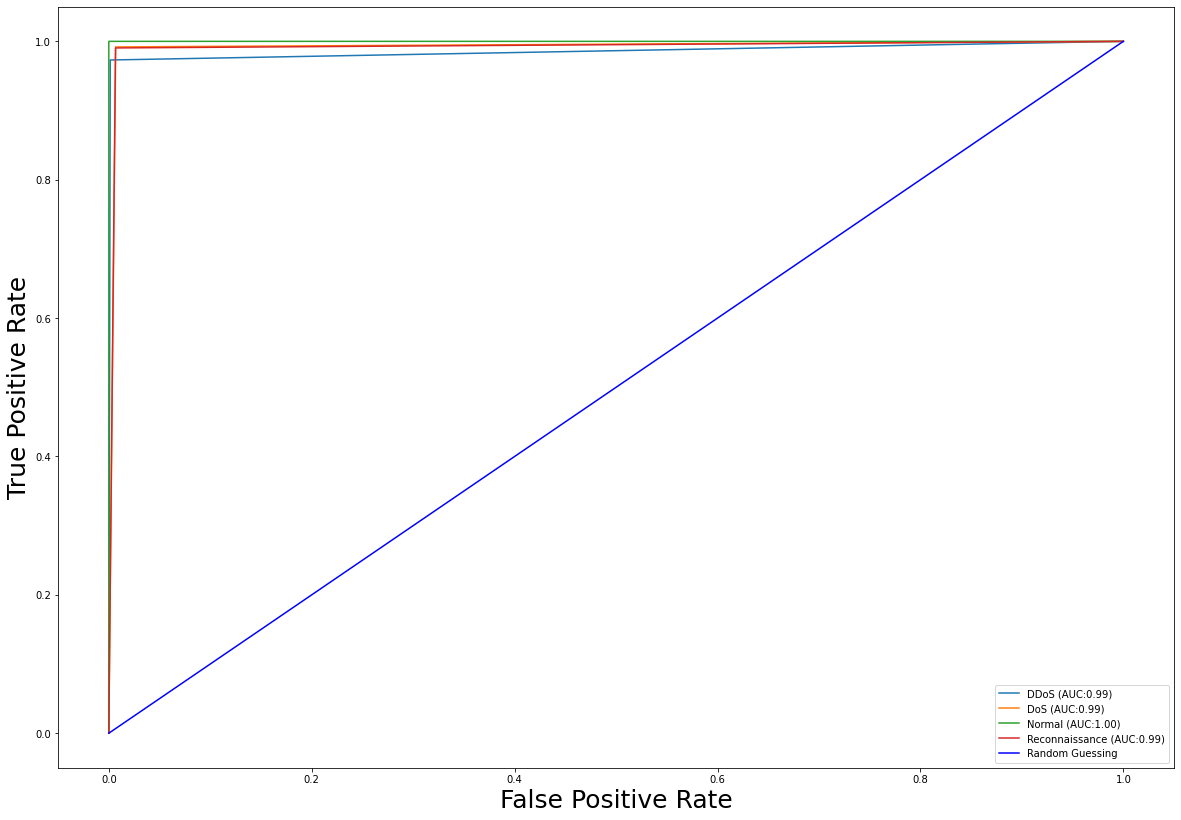

In [58]:
#############################################################
#
# Function for plotting the ROC curve
# 
#############################################################

import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target = ['DDoS', 'DoS', 'Normal', 'Reconnaissance']


fig, c_ax = plt.subplots(1,1, figsize = (20, 14))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(ypred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(yres1, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize=25)
c_ax.set_ylabel('True Positive Rate',fontsize=25)
plt.savefig('ROC_RNN',dpi=400)
plt.show()
